In [ ]:
## WASPI women - any visible shift among women born 1950 and 1955
# https://en.wikipedia.org/wiki/Women_Against_State_Pension_Inequality

In [ ]:
## Look at men/women in this period - maybe mean ptv?

# Say 60 (born ~1960) through 80 (born 1940)

## (narrow in 2019GE 65-70)

In [ ]:
## 

In [1]:
%%time
dataset_name = "W20_comb"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# # pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')


Toggle code

KeyboardInterrupt: 

Wall time: 9.8 s


In [10]:
pan_dataset_ages["Age_at_W19"]

id
1        63.545502
2        67.541886
3        81.507320
4        56.678701
5        73.678701
           ...    
98447    29.073370
98448    30.073370
98449    36.025917
98450    26.073370
98451    44.073370
Name: Age_at_W19, Length: 97006, dtype: float64

In [39]:
search(BES_Panel,"gender")

gender    32177
dtype: int64

In [16]:
((pan_dataset_ages["Age_at_W19"]<70)&(pan_dataset_ages["Age_at_W19"]>65)).sum()

9310

In [30]:
BES_Panel.select_dtypes('datetime')["starttime"].max()

Timestamp('2019-12-23 23:15:36.288000')

In [31]:
BES_Panel.select_dtypes('datetime')["starttime"].min()

Timestamp('2019-12-13 14:52:16.348000')

In [41]:
# Wave 17: 1-12 November (full ptv!, likeLab, likeCorbyn)
# Wave 18: 13Nov-11Dec (1/4 ptv, likeLab, likeCorbyn)
# Wave 19: 13Dec-23Dec (no ptv, likeLab, likeCorbyn, pastvote_ge_2019)


In [42]:
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    return (val * weight).sum() / weight.sum()

In [135]:
df = BES_Panel[["likeLab","likeCorbyn","pastvote_ge_2019","gender","wt"]]

In [136]:
df["Age_at_W19"] = pan_dataset_ages.loc[df.index,"Age_at_W19"]

In [147]:
df["likeLab_dk"] = df["likeLab"]=="Don't know"
df["likeLab_dk"].loc[df["likeLab"].isnull()]=np.nan

In [148]:
df["likeCorbyn_dk"] = df["likeCorbyn"]=="Don't know"
df["likeCorbyn_dk"].loc[df["likeCorbyn"].isnull()]=np.nan

In [153]:
df["votedLabour2019"] = df["pastvote_ge_2019"]=="Labour"
df["votedLabour2019"].loc[df["pastvote_ge_2019"].isnull()]=np.nan


In [139]:
df["likeLab"] = df["likeLab"].cat.codes.replace(-1,np.nan).replace(11,np.nan)
df["likeCorbyn"] = df["likeCorbyn"].cat.codes.replace(-1,np.nan).replace(11,np.nan)


In [140]:
df["likeLab_wts"] = list(zip(df["likeLab"],df["wt"]))
df["likeCorbyn_wts"] = list(zip(df["likeCorbyn"],df["wt"]))
df["votedLabour2019_wts"] = list(zip(df["votedLabour2019"],df["wt"]))

df["likeLab_dk_wts"] = list(zip(df["likeLab_dk"],df["wt"]))
df["likeCorbyn_dk_wts"] = list(zip(df["likeCorbyn_dk"],df["wt"]))


In [141]:
df["ageGroup"] = pd.cut(df["Age_at_W19"],[55,60,65,70,75,80])

In [79]:
df.groupby(["gender","ageGroup"])["likeLab"].mean()

gender  ageGroup
Male    (55, 60]    3.547323
        (60, 65]    3.217370
        (65, 70]    2.855628
        (70, 75]    2.553423
        (75, 80]    2.411499
Female  (55, 60]    3.643658
        (60, 65]    3.382498
        (65, 70]    2.903281
        (70, 75]    2.502668
        (75, 80]    2.379257
Name: likeLab, dtype: float64

In [85]:
df.groupby(["gender","ageGroup"])["likeLab_wts"].agg(weighted_mean)

gender  ageGroup
Male    (55, 60]    3.362598
        (60, 65]    3.013365
        (65, 70]    2.596471
        (70, 75]    2.390288
        (75, 80]    2.286407
Female  (55, 60]    3.433323
        (60, 65]    3.182236
        (65, 70]    2.688583
        (70, 75]    2.319419
        (75, 80]    2.285802
Name: likeLab_wts, dtype: float64

In [80]:
df.groupby(["gender","ageGroup"])["likeLab"].count()

gender  ageGroup
Male    (55, 60]    1606
        (60, 65]    2038
        (65, 70]    1981
        (70, 75]    1928
        (75, 80]     887
Female  (55, 60]    1695
        (60, 65]    2034
        (65, 70]    2347
        (70, 75]    1874
        (75, 80]     646
Name: likeLab, dtype: int64

In [81]:
df.groupby(["gender","ageGroup"])["likeCorbyn"].mean()

gender  ageGroup
Male    (55, 60]    2.407797
        (60, 65]    1.973594
        (65, 70]    1.698389
        (70, 75]    1.350569
        (75, 80]    1.200676
Female  (55, 60]    2.439625
        (60, 65]    2.158228
        (65, 70]    1.814219
        (70, 75]    1.529567
        (75, 80]    1.423729
Name: likeCorbyn, dtype: float64

In [86]:
df.groupby(["gender","ageGroup"])["likeCorbyn_wts"].agg(weighted_mean)

gender  ageGroup
Male    (55, 60]    2.190725
        (60, 65]    1.781592
        (65, 70]    1.526282
        (70, 75]    1.230621
        (75, 80]    1.134685
Female  (55, 60]    2.279196
        (60, 65]    2.001241
        (65, 70]    1.662583
        (70, 75]    1.378378
        (75, 80]    1.350969
Name: likeCorbyn_wts, dtype: float64

In [89]:
df.groupby(["gender","ageGroup"])["votedLabour2019"].mean()

gender  ageGroup
Male    (55, 60]    0.254279
        (60, 65]    0.217644
        (65, 70]    0.196598
        (70, 75]    0.152420
        (75, 80]    0.125420
Female  (55, 60]    0.268879
        (60, 65]    0.250120
        (65, 70]    0.191410
        (70, 75]    0.147105
        (75, 80]    0.149163
Name: votedLabour2019, dtype: float64

In [93]:
df.groupby(["gender","ageGroup"])["votedLabour2019_wts"].agg(weighted_mean)

gender  ageGroup
Male    (55, 60]    0.227508
        (60, 65]    0.195777
        (65, 70]    0.165467
        (70, 75]    0.135313
        (75, 80]    0.112721
Female  (55, 60]    0.238827
        (60, 65]    0.223068
        (65, 70]    0.167532
        (70, 75]    0.122155
        (75, 80]    0.135795
Name: votedLabour2019_wts, dtype: float64

In [109]:
df["ageGroup"].cat.codes.replace(-1,np.nan)

id
2        2.0
3        NaN
6        NaN
7        1.0
14       NaN
        ... 
98435    NaN
98437    NaN
98440    NaN
98445    NaN
98449    NaN
Length: 32177, dtype: float64

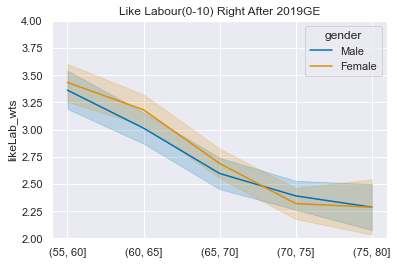

In [124]:
mask = df["ageGroup"].notnull()&df["likeLab"].notnull()

sns.lineplot(data=df[mask],x=df["ageGroup"][mask].cat.codes.replace(-1,np.nan),
            y="likeLab_wts",hue="gender",estimator=weighted_mean);#,orientation='h');
plt.ylim(2,4);
plt.xticks(range(0,len(df["ageGroup"].cat.categories)),[str(x) for x in df["ageGroup"].cat.categories]);
plt.title("Like Labour(0-10) Right After 2019GE");

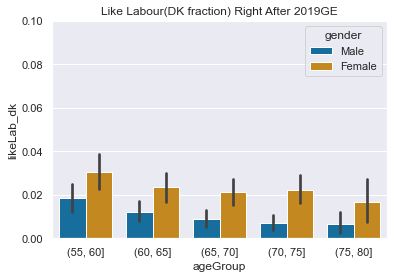

In [103]:
sns.barplot(data=df,x="ageGroup",y="likeLab_dk",hue="gender");
plt.ylim(0,.1);
plt.title("Like Labour(DK fraction) Right After 2019GE");

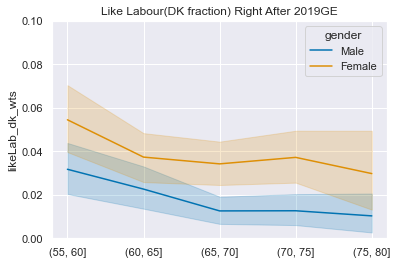

In [145]:
mask = df["ageGroup"].notnull()&df["likeLab_dk"].notnull()

sns.lineplot(data=df[mask],x=df["ageGroup"][mask].cat.codes.replace(-1,np.nan),
            y="likeLab_dk_wts",hue="gender",estimator=weighted_mean);#,orientation='h');
plt.ylim(0,.1);
plt.xticks(range(0,len(df["ageGroup"].cat.categories)),[str(x) for x in df["ageGroup"].cat.categories]);
plt.title("Like Labour(DK fraction) Right After 2019GE");

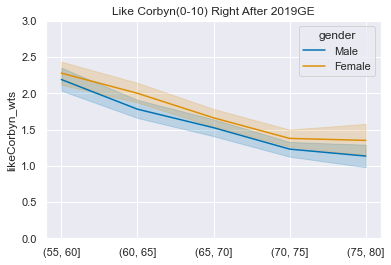

In [131]:
mask = df["ageGroup"].notnull()&df["likeCorbyn"].notnull()

sns.lineplot(data=df[mask],x=df["ageGroup"][mask].cat.codes.replace(-1,np.nan),
            y="likeCorbyn_wts",hue="gender",estimator=weighted_mean);#,orientation='h');
plt.ylim(0,3);
plt.xticks(range(0,len(df["ageGroup"].cat.categories)),[str(x) for x in df["ageGroup"].cat.categories]);
plt.title("Like Corbyn(0-10) Right After 2019GE");

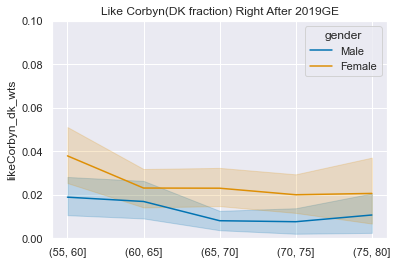

In [144]:
mask = df["ageGroup"].notnull()&df["likeCorbyn_dk"].notnull()

sns.lineplot(data=df[mask],x=df["ageGroup"][mask].cat.codes.replace(-1,np.nan),
            y="likeCorbyn_dk_wts",hue="gender",estimator=weighted_mean);#,orientation='h');
plt.ylim(0,.1);
plt.xticks(range(0,len(df["ageGroup"].cat.categories)),[str(x) for x in df["ageGroup"].cat.categories]);
plt.title("Like Corbyn(DK fraction) Right After 2019GE");

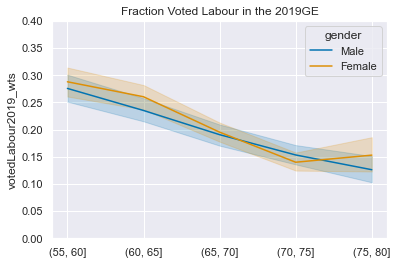

In [156]:
mask = df["ageGroup"].notnull()&df["votedLabour2019"].notnull()

sns.lineplot(data=df[mask],x=df["ageGroup"][mask].cat.codes.replace(-1,np.nan),
            y="votedLabour2019_wts",hue="gender",estimator=weighted_mean);#,orientation='h');
plt.ylim(0,.4);
plt.xticks(range(0,len(df["ageGroup"].cat.categories)),[str(x) for x in df["ageGroup"].cat.categories]);
plt.title("Fraction Voted Labour in the 2019GE");